# Discrete logarithm problem

This problem arises in many fields in cryptography and this is why it is worth having a quick look on it. Roughly speaking is the problem of finding $k$ such that $a^k$(mod $p$)=$n$ where we know $a$ and $p$. This may seem a super simple problem (if we don't work in the modulo operation but in plain real numbers we use the logarithm for that) but as we will see finding $k$ is a brute force task. 


First of all we have to choose a  prime number $p$ 

In [20]:
from crypt import generateLargePrime

# p is a large prime number
p = generateLargePrime(16)  
print("is p={} a large prime number? {}".format(p, isPrime(p, 40)))

is p=63667 a large prime number? True


We also need a generator for such a prime

In [22]:
from crypt import findGeneratorPrime

g = findGeneratorPrime(p)

print("g = {} is a generator of the field F_{}".format(g, p))

g = 48614 is a generator of the field F_63667


We then know that $g$ is going to generate all the numbers in the field. We know that since $p$ is prime, all numbers from 1 to $p-1$ are invertible and so we can generate all numbers by powering $g$. Just as a matter of check, we find the number of invertible elements:

In [30]:
from crypt import InvertibleNumbers

invertible = len(InvertibleNumbers(p))
print("Number of inverible elements is {} wich should be {} if p is prime".format(invertible, p-1))

Number of inverible elements is 63666 wich should be 63666 if p is prime


We require to calculate large integer powers, for instance 23456^99999 (mod $p$), this will blow our computer!. One way to calculate this could be multiplying 23456 by itself 99999 times and apply the operation (mod $p$) every time we multiply but this turns out to be still slow. A better way is the fast powering algorithm (see [An Introduction to Mathematical Cryptography](https://www.springer.com/gp/book/9781493917105)). 

In [31]:
from crypt import fastPowering

Now we choose the secret, we will take $k=1234$. So $g^k$(mod p) is:

In [32]:
k = 1234
gkp = fastPowering(g, k, p)

print(gkp)

2870


In [33]:
print("g = {}\nk = {}\ng^k = a = {}".format(g, k, gkp))

g = 48614
k = 1234
g^k = a = 2870


Now the attacker receives the quantity $a=g^k$(mod p) and the task is to check for which $k$ we get a. Now by brute force mode let's try to find all the values $k$ that satisfy $a=g^k$(mod p)

In [42]:
for i in range(1, p-1):
    a = fastPowering(g,i,p)
    if a==gkp:
        print("i={}, a={}".format(i, a))

i=1234, a=2870


We found the right one!. This case has been fast but as the prime number becomes larger this time increases a lot. In order to see the difficulty of the problem let me plot all the values of $a$ for different $k$s

<Figure size 432x288 with 0 Axes>

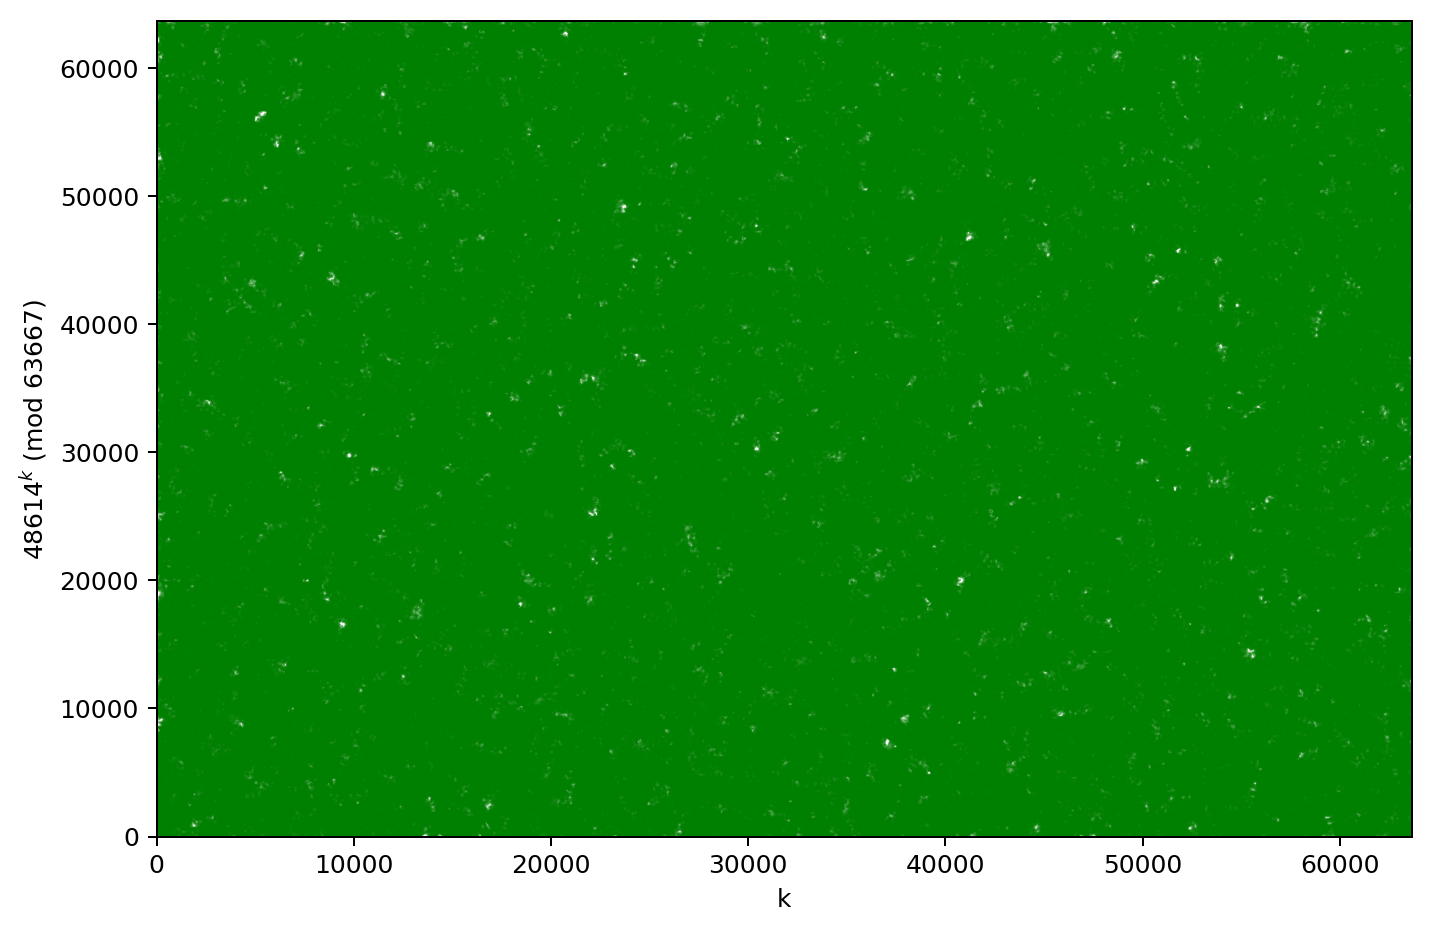

In [44]:
x, y = [], []

for i in range(1, p-1):
    x.append(i)
    y.append(fastPowering(g,i,p))

import matplotlib.pyplot as plt
%matplotlib inline

plt.clf()
fig=plt.figure(dpi = 180, figsize=(9,6))

plt.scatter(x, y, c="g", alpha=0.5, marker=r'$\bigstar$',
            label="")
plt.xlabel("k")
plt.ylabel("${}^k$ (mod ${}$)".format(g, p))
#plt.legend(loc='upper right')
plt.ylim((0, p))
plt.xlim((0, p-1))
plt.show()

As you can see this seems random... In fact it is unpredictable. Let me show a zoom of this graph for values of $k$ between 2000 and 3000 and with lines to see the randomicity.

<Figure size 432x288 with 0 Axes>

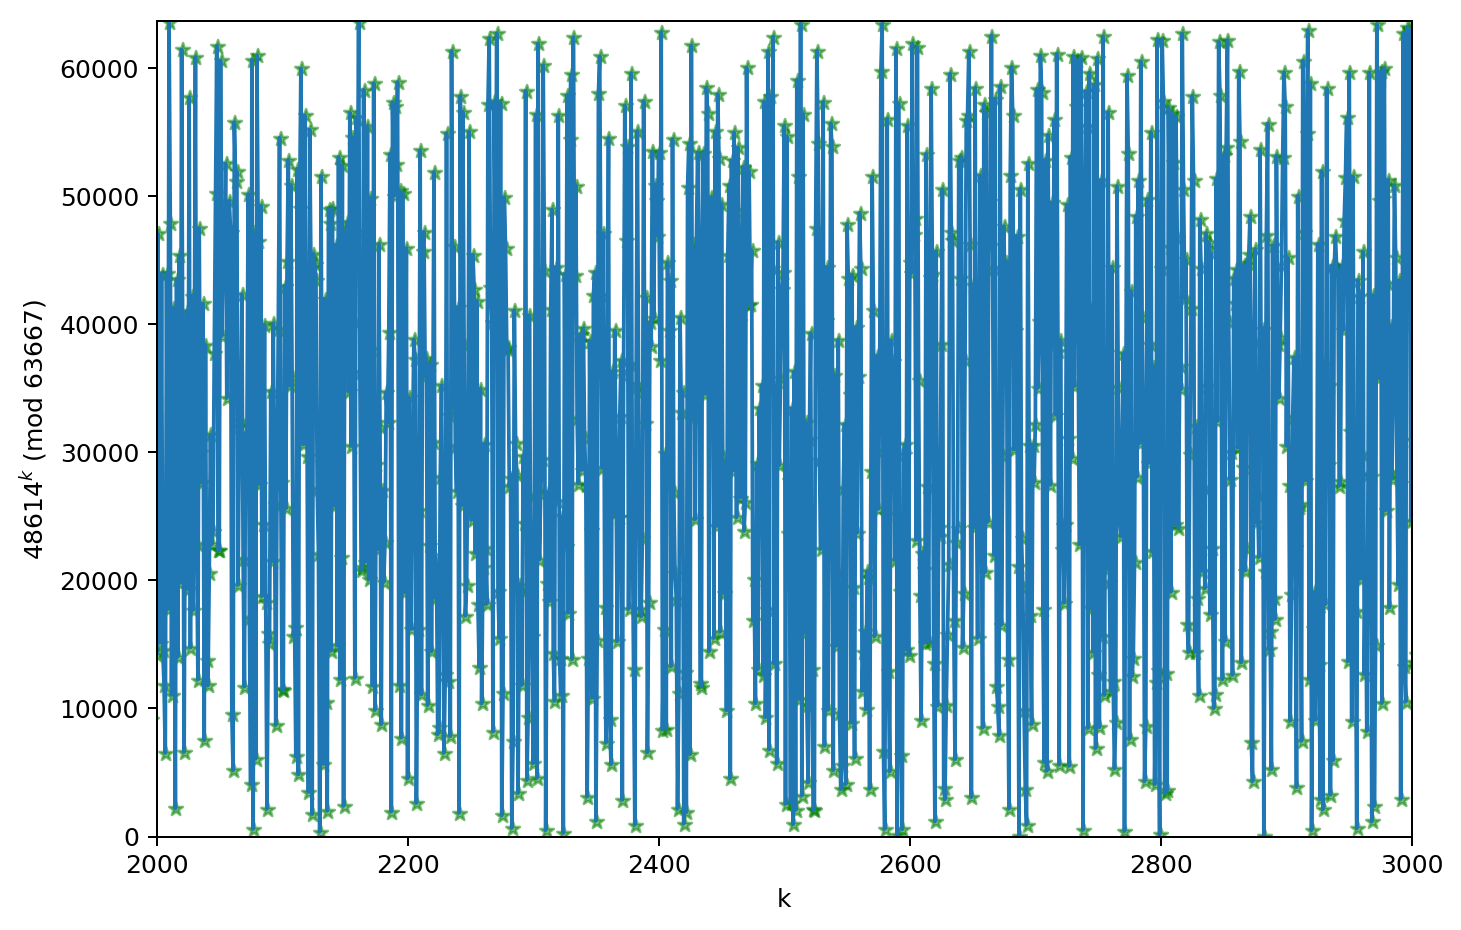

In [47]:
plt.clf()
fig=plt.figure(dpi = 180, figsize=(9,6))

plt.scatter(x, y, c="g", alpha=0.5, marker=r'$\bigstar$',
            label="")
plt.plot(x, y)
plt.xlabel("k")
plt.ylabel("${}^k$ (mod ${}$)".format(g, p))
#plt.legend(loc='upper right')
plt.ylim((0, p))
plt.xlim((2000, 3000))
plt.show()

This is very chaotic and thus the attacker has to options, either check from beginning to end to find the value of $k$ or sample values of $k$ randomly to check. Hard task to perform for large $p$.

The solution $n$ is not unique, i.e. there is more than one $k$ such that $g^k$(mod $p$)=$a$. We can see that from Fermat's litte therorem $g^{p-1}=1$(mod $p$) for $p$ prime, hence if $k$ is a solution then $k+\phi(p-1)$ is also a solution, where $\phi$ is an natural number.

Let's check this with same $g=627$ and $p=941$ exploring $k$ until 99999.

In [48]:
a = 627
p = 941

x = list()
y = list()

for i in range(0, 99999):
    x.append(i)
    y.append(fastPowering(a,i,p))

Let's see for which $k$s we get the same number $n$

In [49]:
#define the function to calculate the next k with same n
k2 = lambda x: k + x*(p-1)

for i in range(1,8):
    k = k2(i)
    print("k={}, n={}".format(x[i], y[i]))

k=1, n=627
k=2, n=732
k=3, n=697
k=4, n=395
k=5, n=182
k=6, n=253
k=7, n=543


In [50]:
# TODO: Diffie-Hellman key exchange